### 데이터 로드

In [39]:
data = pd.read_csv("datas.csv")

In [40]:
data.shape

(970227, 27)

In [42]:
data.info() ### NA값은 없는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970227 entries, 0 to 970226
Data columns (total 27 columns):
boosts             970227 non-null int64
damageDealt        970227 non-null float64
deathType          970227 non-null object
headshotKills      970227 non-null int64
heals              970227 non-null int64
killPlace          970227 non-null int64
killStreaks        970227 non-null int64
kills              970227 non-null int64
longestKill        970227 non-null float64
match              970227 non-null object
name               970227 non-null object
playerId           970227 non-null object
rideDistance       970227 non-null float64
roadKills          970227 non-null int64
swimDistance       970227 non-null float64
teamKills          970227 non-null int64
timeSurvived       970227 non-null float64
vehicleDestroys    970227 non-null int64
walkDistance       970227 non-null float64
weaponsAcquired    970227 non-null int64
winPlace           970227 non-null int64
url         

In [43]:
data.head()

,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,match,...,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,url,x,y,total_numb,airplane,player_location
0,16,1295.24290,alive,3,8,1,1,12,395.582980,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,0,4472.6895,7,1,https://telemetry-cdn.playbattlegrounds.com/bl...,628502.00000,253773.046875,96,BHHB,CG
1,11,77.00000,byplayer,0,11,22,1,1,21.763872,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,0,4519.2040,6,2,https://telemetry-cdn.playbattlegrounds.com/bl...,387182.50000,419851.812500,96,BHHB,ED
2,4,462.20062,byplayer,0,2,9,1,2,6.395913,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,0,2782.6619,4,3,https://telemetry-cdn.playbattlegrounds.com/bl...,471174.21875,450639.000000,96,BHHB,EE
3,9,381.79507,byplayer,1,1,4,1,3,85.295810,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,0,3207.1172,5,4,https://telemetry-cdn.playbattlegrounds.com/bl...,363886.18750,422893.625000,96,BHHB,ED
4,13,272.81220,byplayer,0,8,10,1,2,68.416620,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,0,1895.4843,4,5,https://telemetry-cdn.playbattlegrounds.com/bl...,285371.06250,483153.906250,96,BHHB,EC


### 승률 데이터 생성

In [64]:
data["winPlacePerc"] = round((data["total_numb"] - data["winPlace"] + 1) / data["total_numb"], 4)

### 데이터 EDA

#### 킬 vs WinPlace
- 대부분의 유저들이 킬을 많이 못하는 것을 알 수 있다.

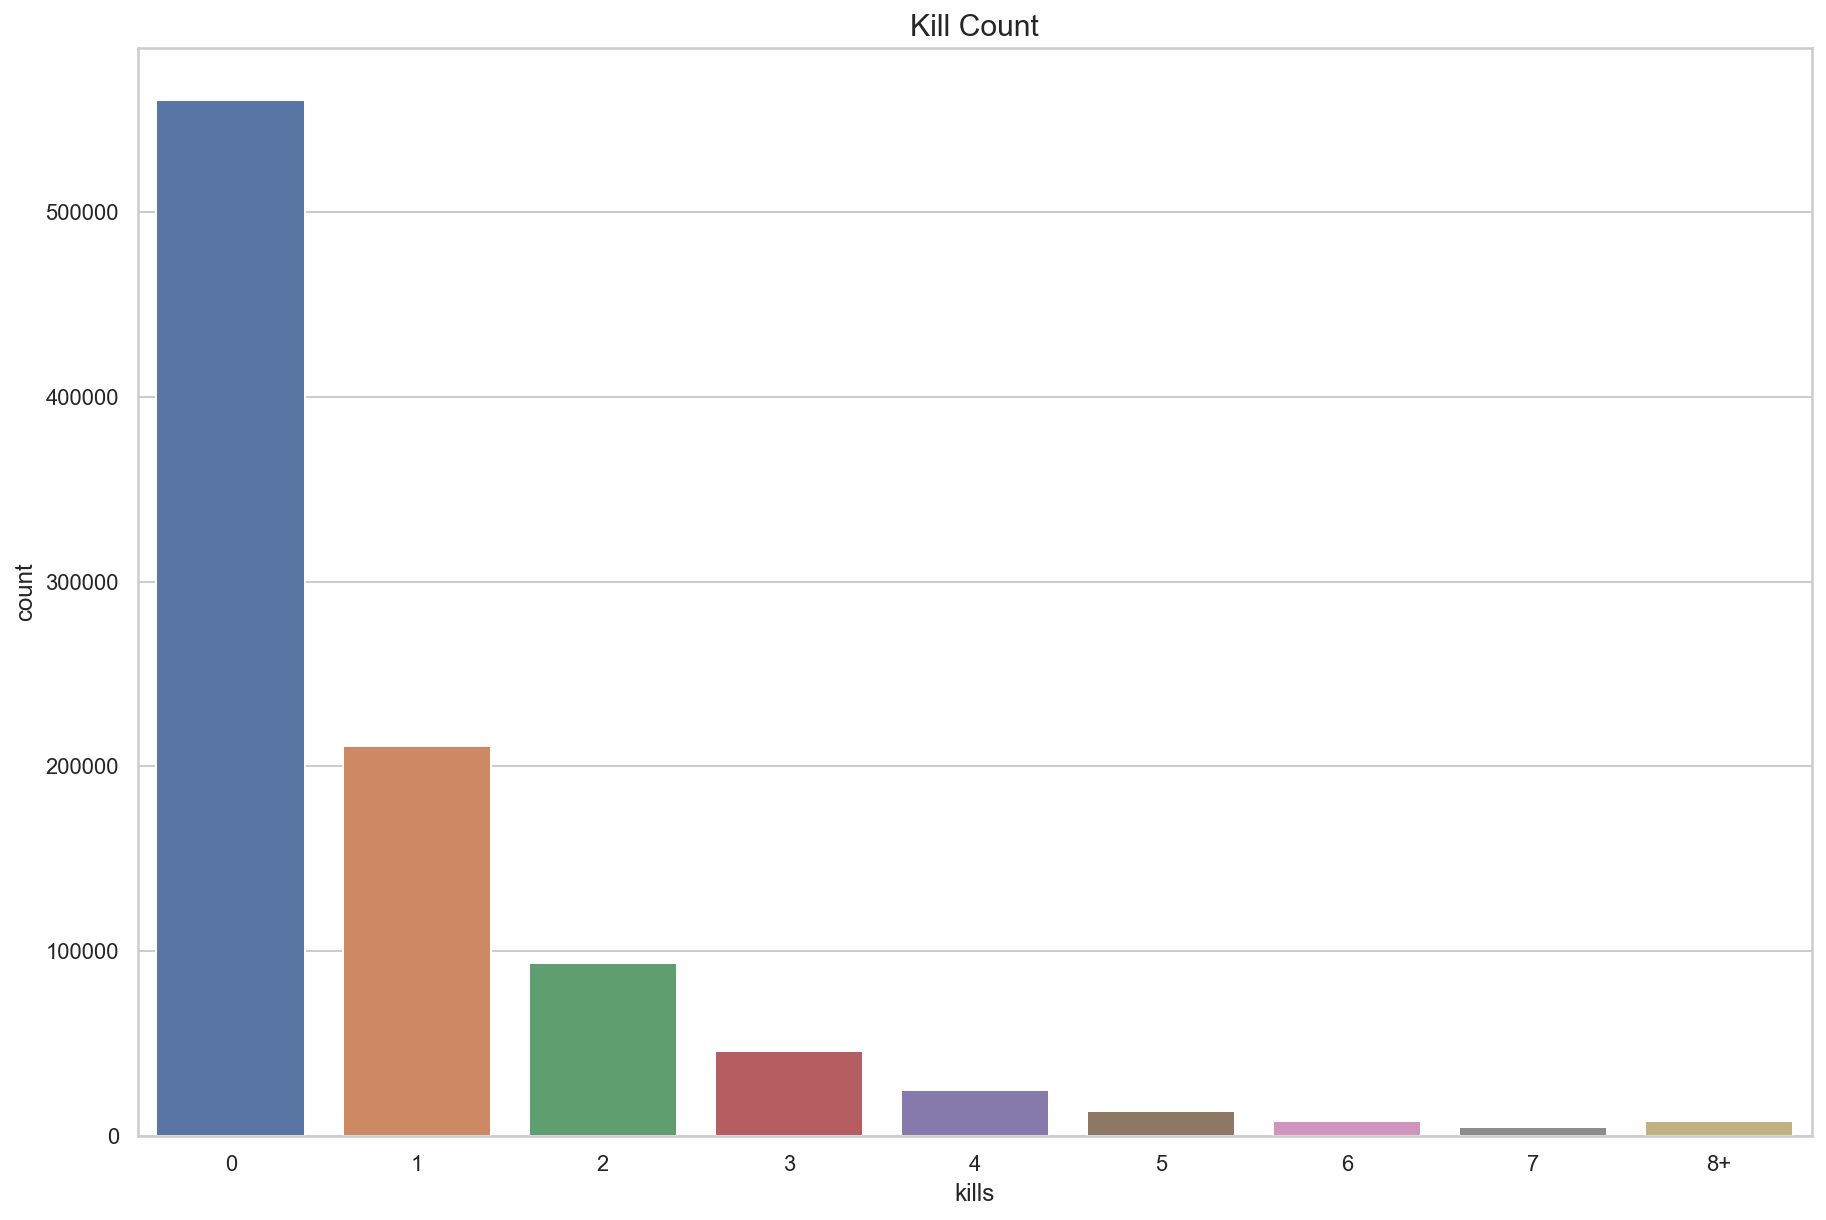

In [60]:
df = data.copy()
df.loc[df['kills'] > df['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(df['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

#### 0킬인 사람들의 딜량

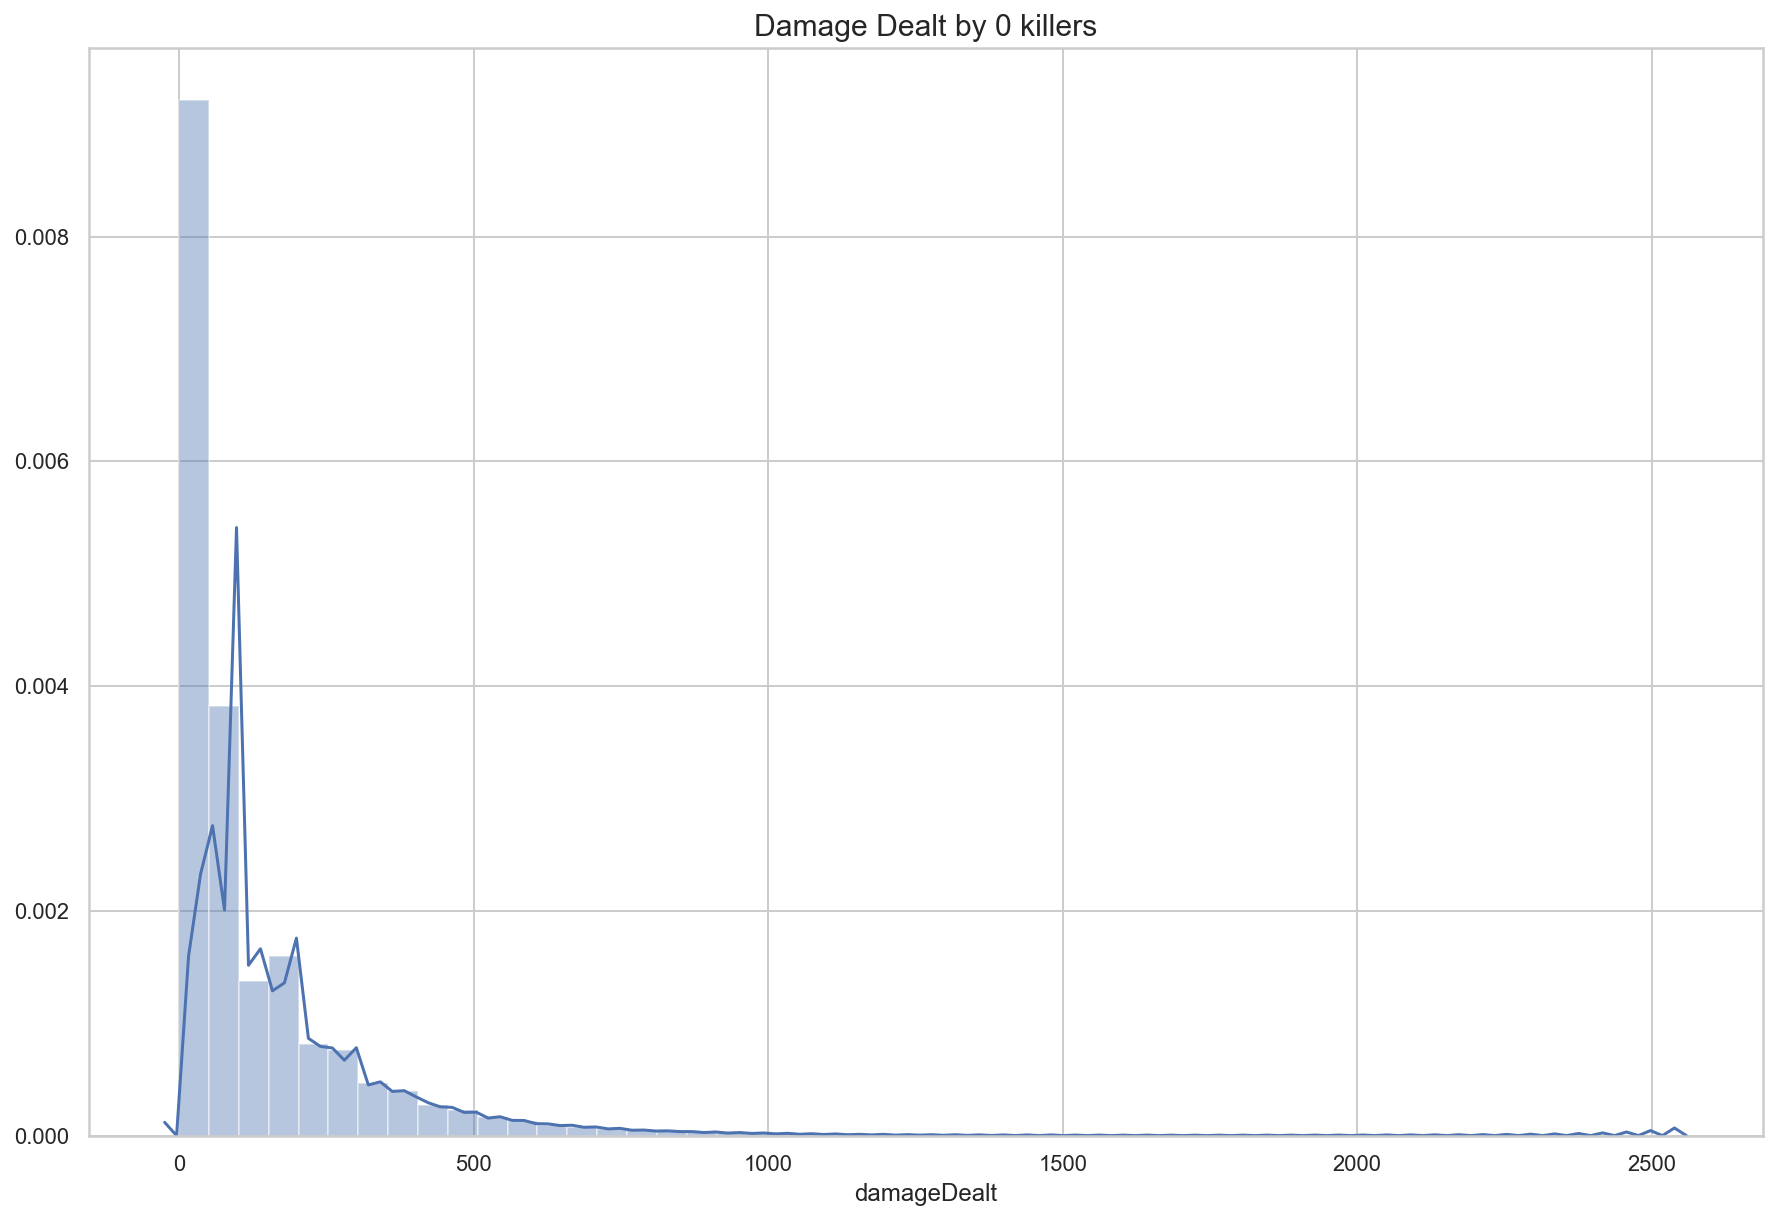

In [50]:
df = data.copy()
df = df[df['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

#### Plot win placement percentage vs kills.
- 승률이 높은 사람은 킬과 높은 상관관계를 가지는 것을 알 수 있다.

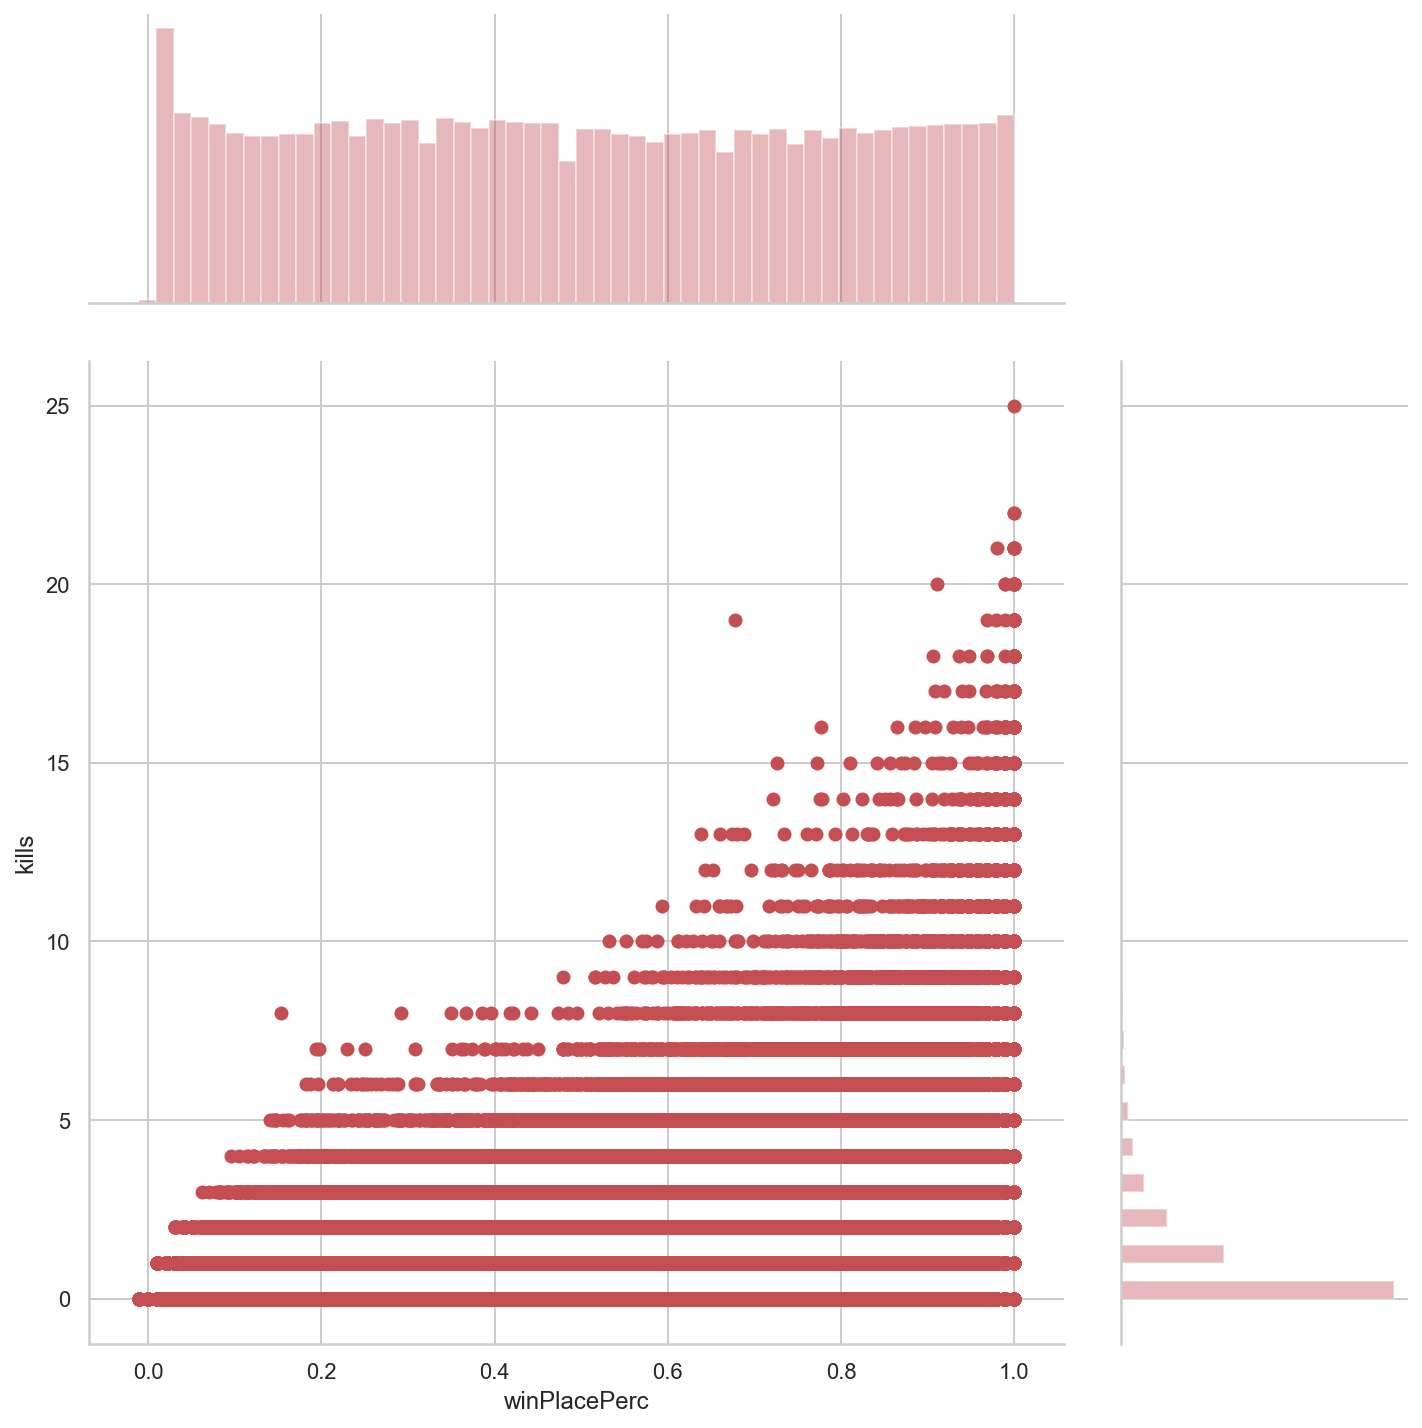

In [67]:
sns.jointplot(x="winPlacePerc", y="kills", data=data, height=10, ratio=3, color="r")
plt.show()

#### 킬이 승률과 상관관계가 있는 것을 확인 후 구간별로 나누아서 관계를 확인

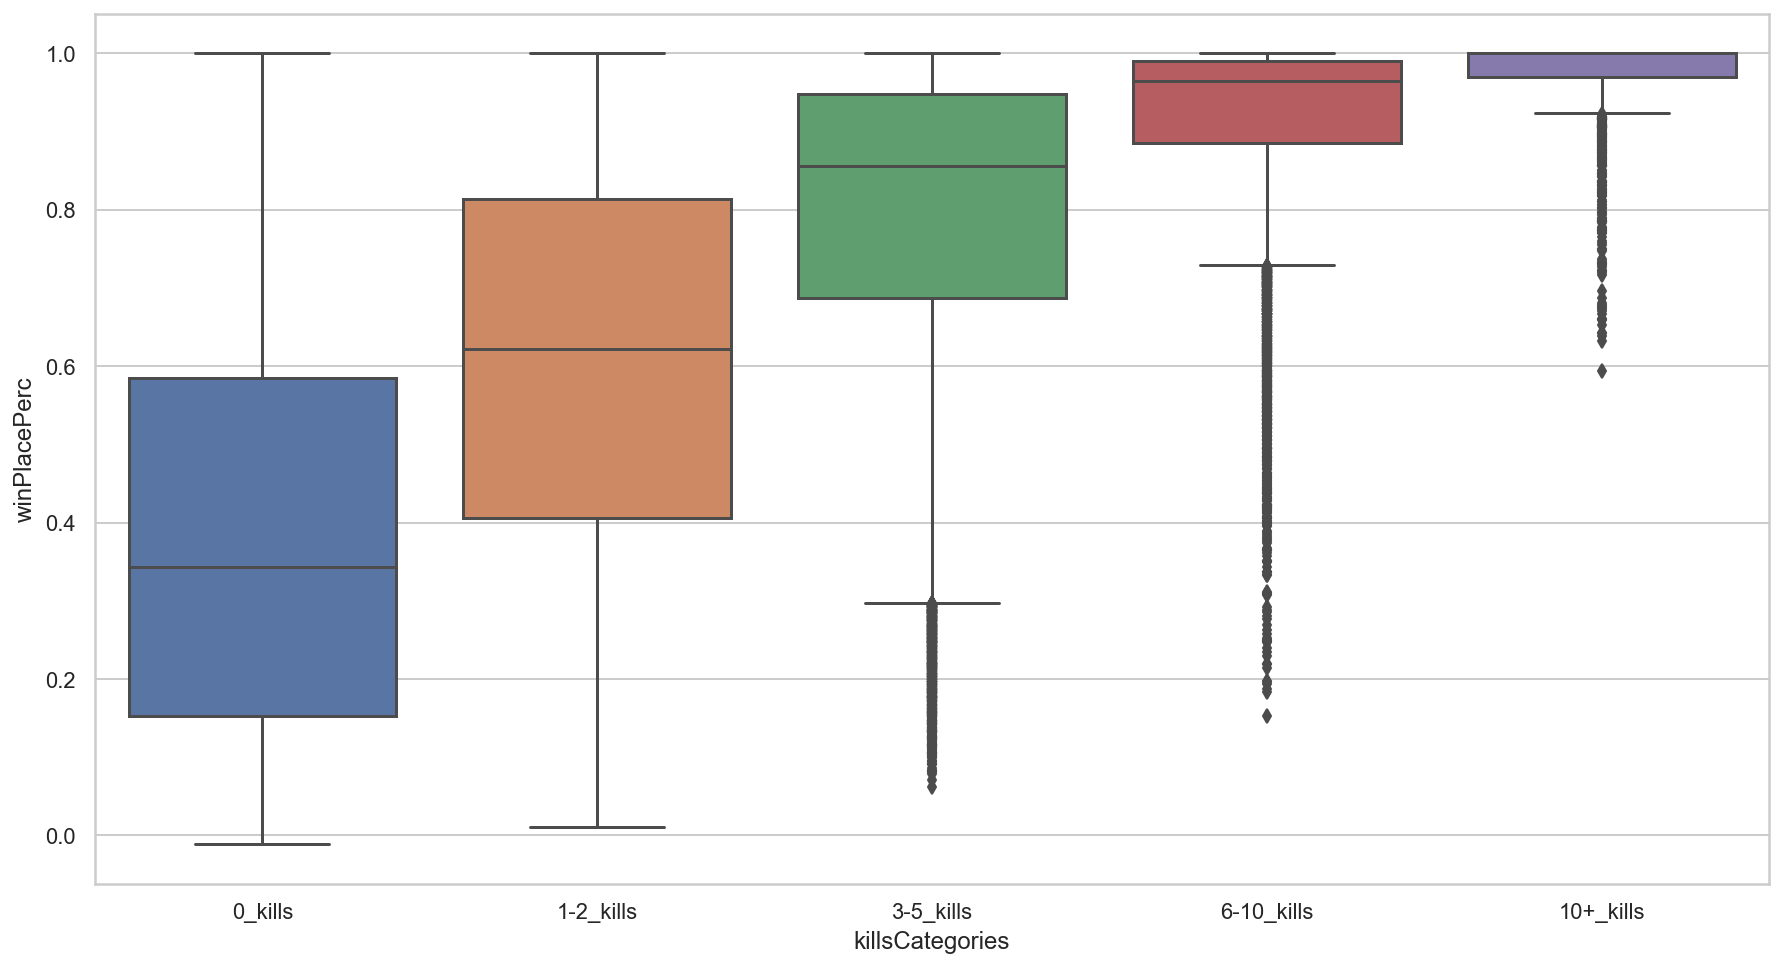

In [68]:
kills = data.copy()
kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

#### 많은 유저들이 움직인 거리가 짧다.

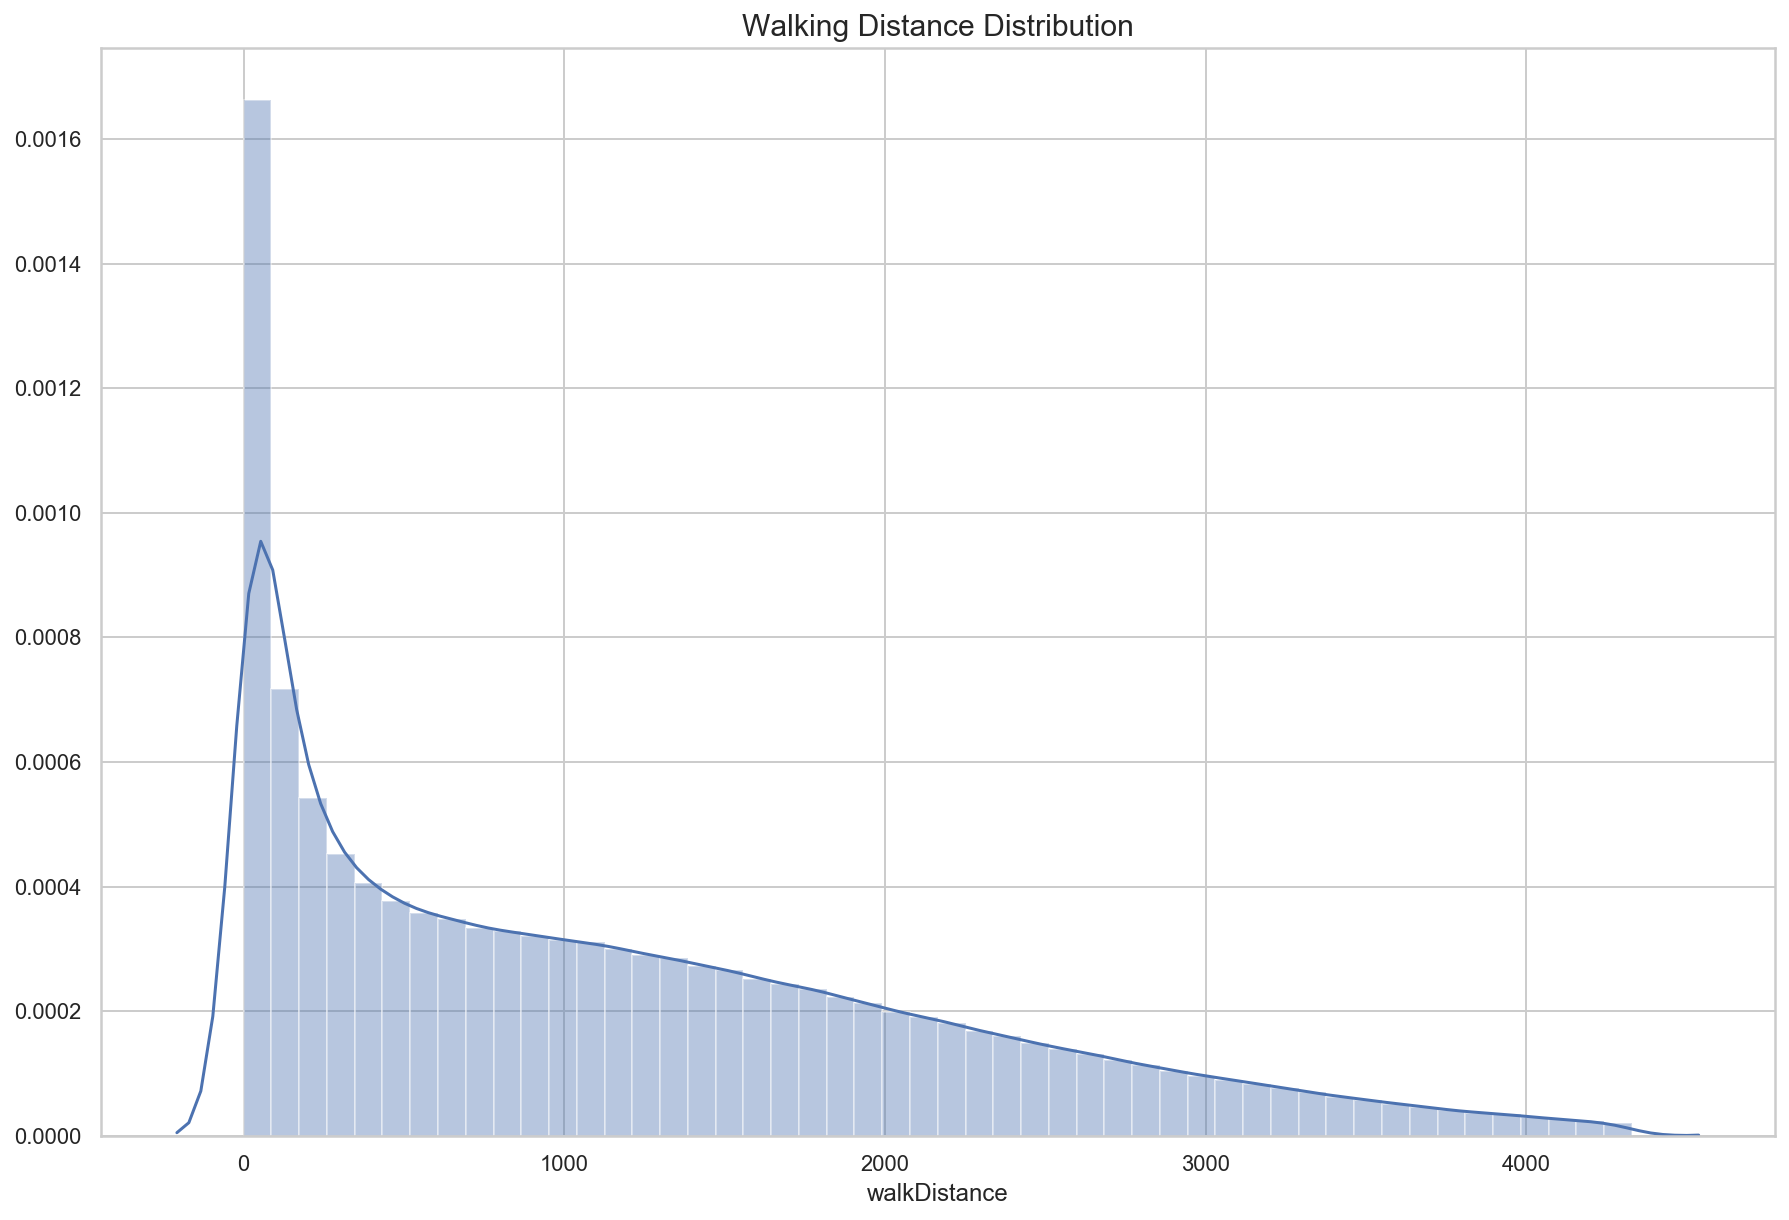

In [69]:
df = data.copy()
df = df[df['walkDistance'] < df['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(df['walkDistance'])
plt.show()

#### 승률이 높은 유저가 움직인 거리가 많은 것을 알 수 있다.

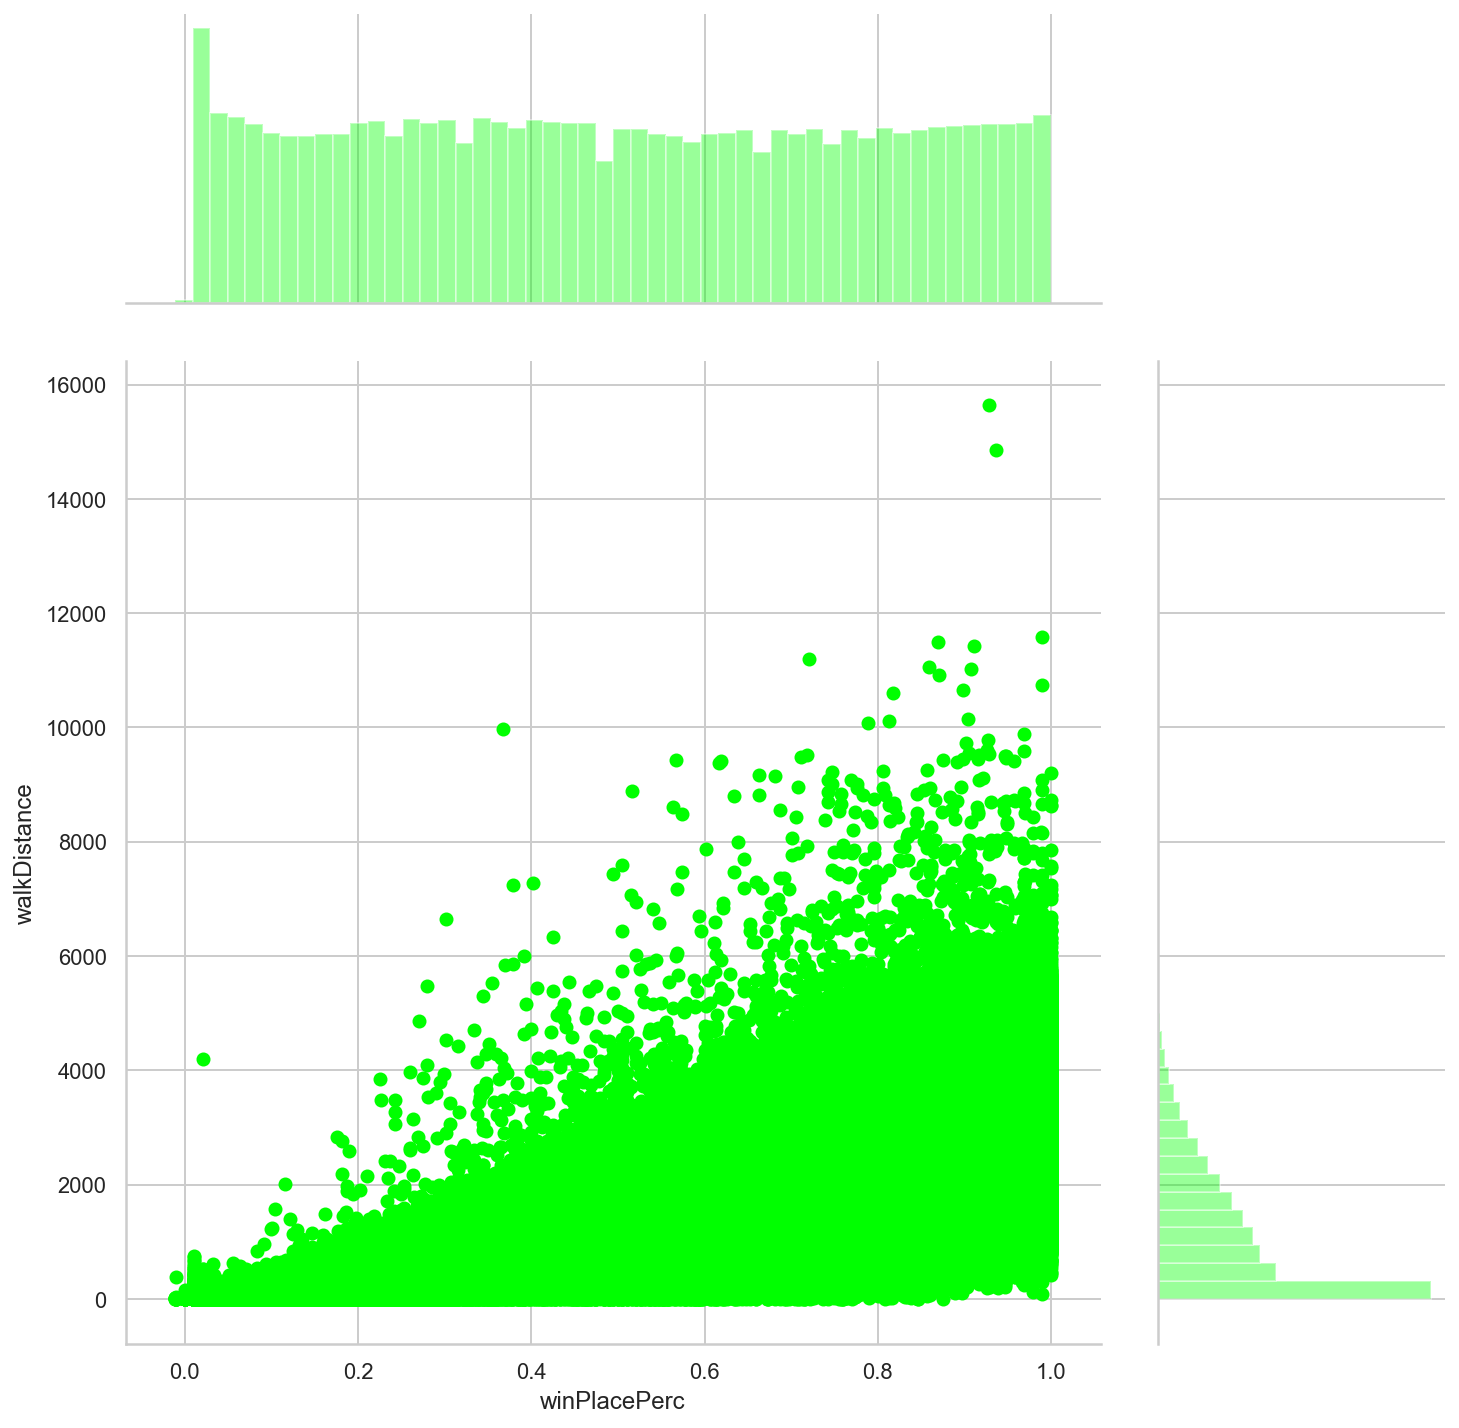

In [70]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=data, height=10, ratio=3, color="lime")
plt.show()

#### 승률이 높은 유저는 힐 아이템 사용이 많다

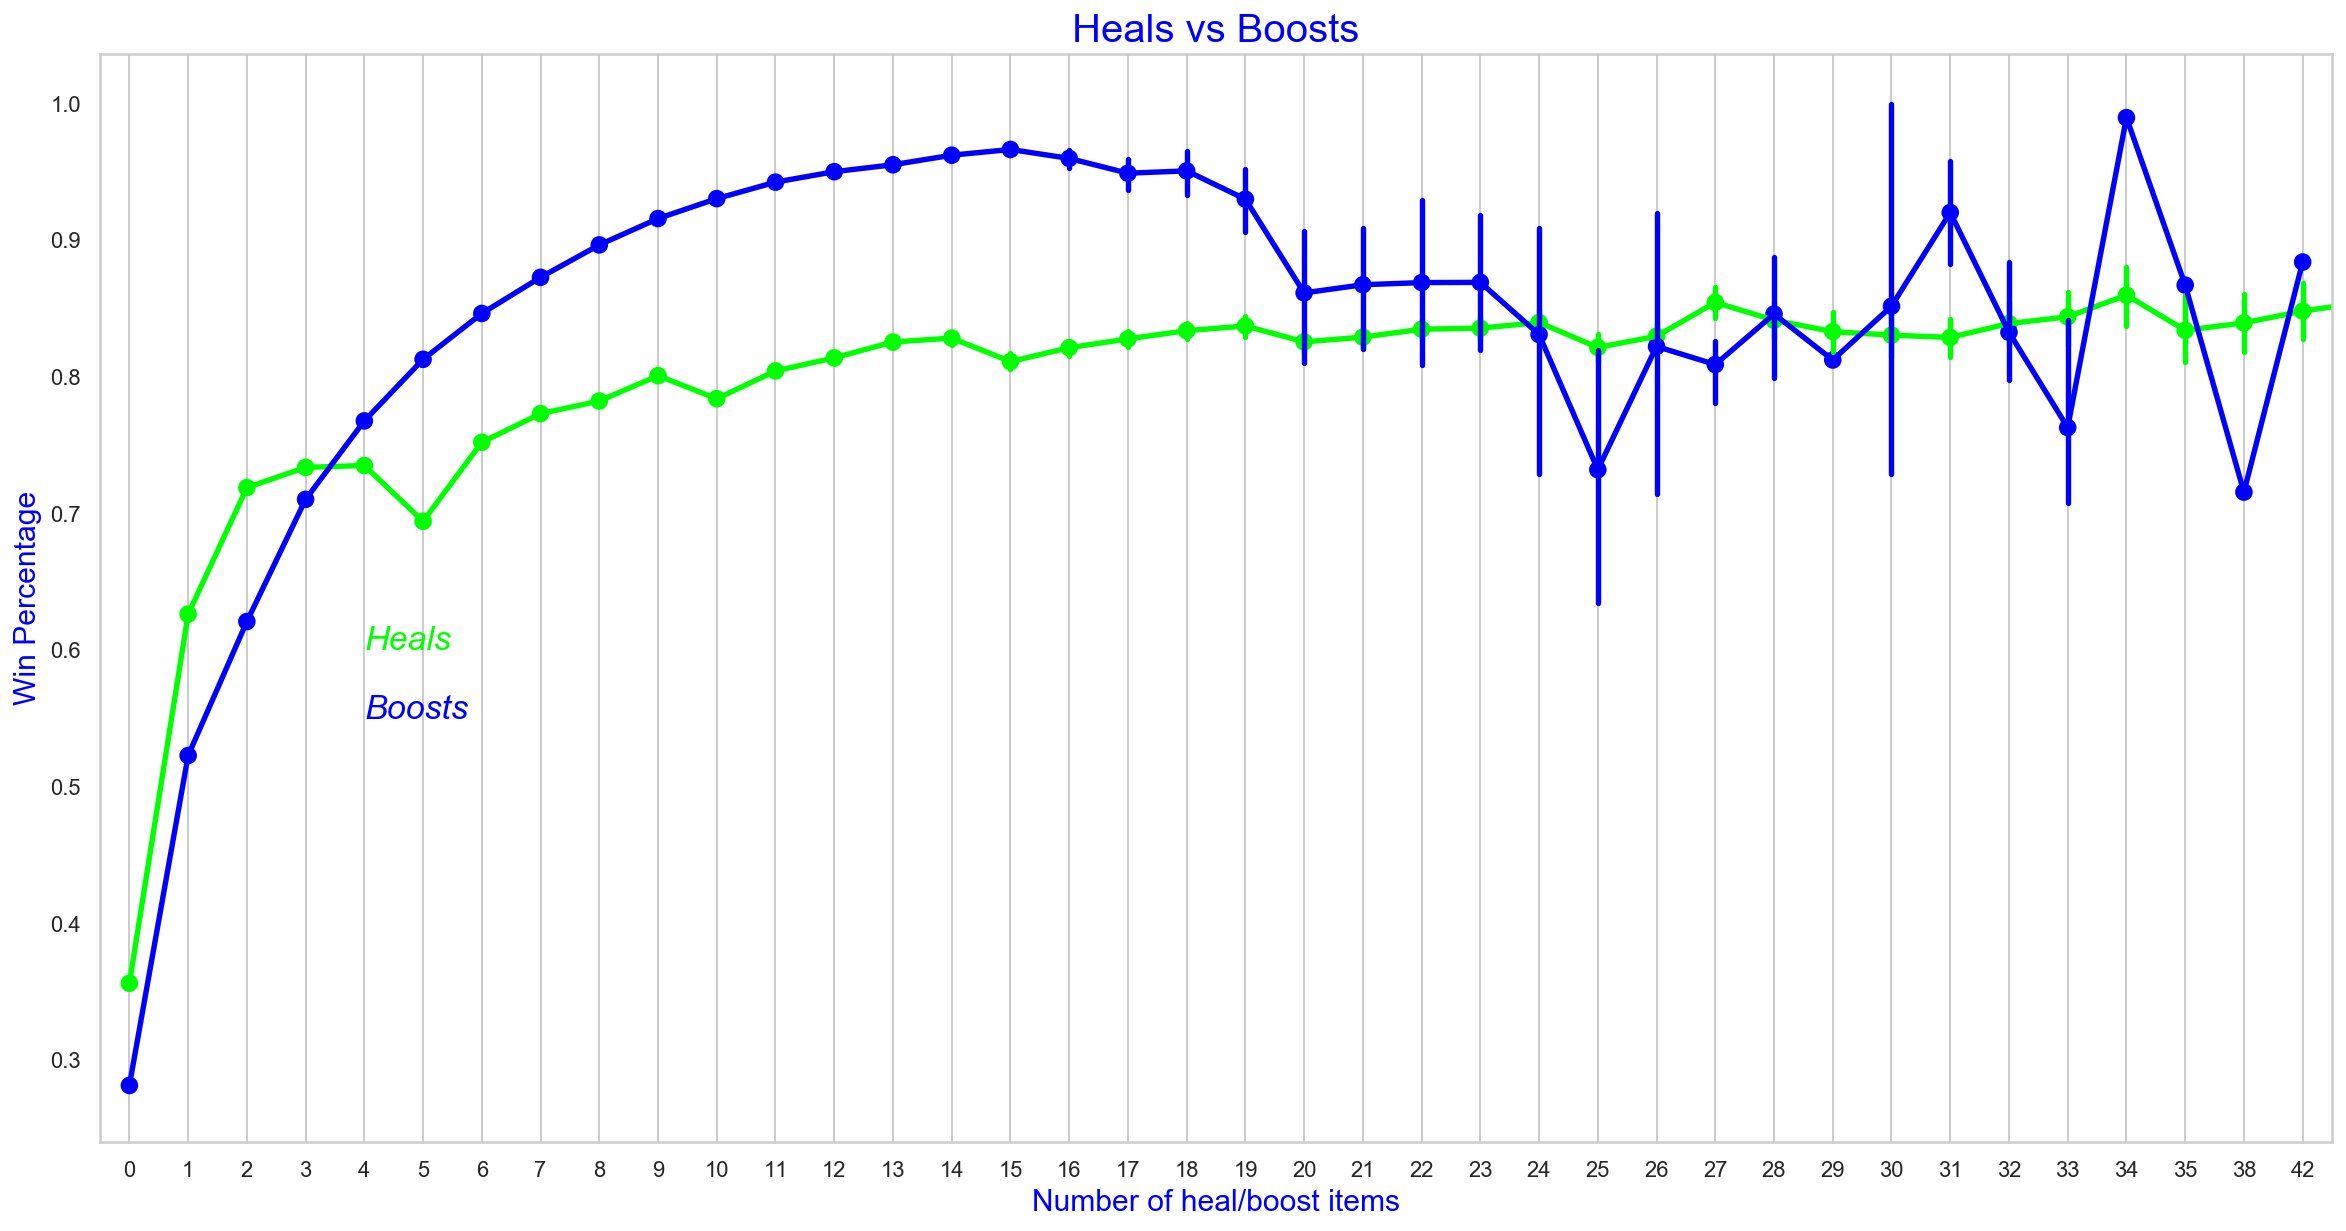

In [71]:
df = data.copy()
df = df[df['heals'] < df['heals'].quantile(0.99)]
df = df[df['boosts'] < df['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

#### 승률과 힐량이 상관관계가 높은 것을 알 수 있다.

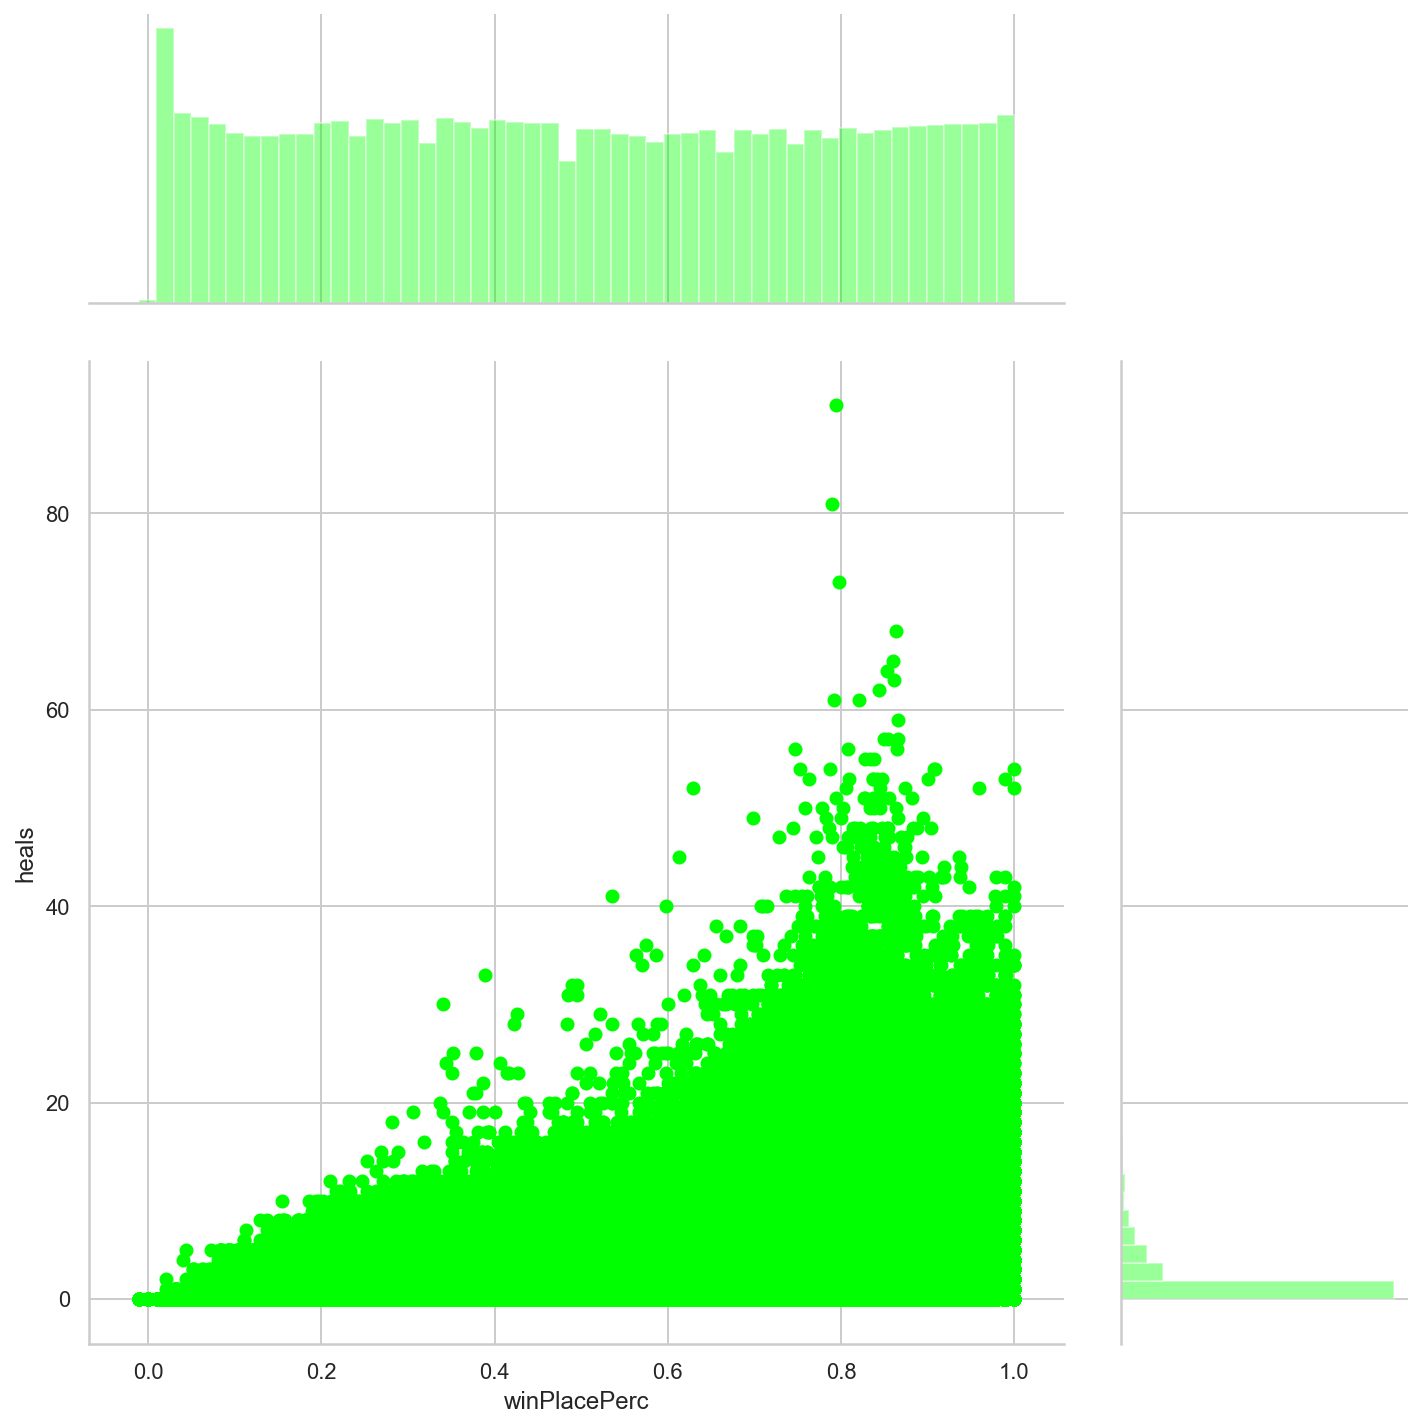

In [72]:
sns.jointplot(x="winPlacePerc", y="heals", data=data, height=10, ratio=3, color="lime")
plt.show()

랜딩 포인트의 구역 내에 떨어진 사람의 수가 승률 예측에 영향을 미친다?

In [44]:
df = data.groupby("airplane")["match"].unique().reset_index(name="match")
df["count"] = df["match"].apply(lambda x: len(x))
df = df[["airplane", "count"]].sort_values(by="count", ascending=False)
df.head(10)

,airplane,count
203,HHAA,119
8,AAHH,105
2,AAFH,88
25,ADHC,83
189,HFAA,81
115,EHFA,81
113,EHDA,80
97,DHDA,80
193,HFAE,79
74,CADH,77


#### 같은 매치에서 같은 구역에 내린 유저 카운트

In [75]:
loc_num = data.groupby(["match", "player_location"]).size()
loc_num

match                                 player_location
0002994d-669c-4ba4-87de-afc2cca69fe7  BA                 1
                                      BB                 1
                                      CA                 2
                                      CB                 8
                                      CC                 5
                                                        ..
fffe96b4-d7cb-4967-8e3b-a09e4a3ebc87  GB                 1
                                      GD                 3
                                      GF                 1
                                      HC                 4
                                      HD                 1
Length: 251544, dtype: int64

In [78]:
loc_nums = pd.DataFrame(loc_num)
loc_nums.columns = ["loc_num"]
loc_nums

loc_num
match                                player_location         
0002994d-669c-4ba4-87de-afc2cca69fe7 BA                     1
                                     BB                     1
                                     CA                     2
                                     CB                     8
                                     CC                     5
...                                                       ...
fffe96b4-d7cb-4967-8e3b-a09e4a3ebc87 GB                     1
                                     GD                     3
                                     GF                     1
                                     HC                     4
                                     HD                     1

[251544 rows x 1 columns]

#### 같은 구역에 내린 카운트 데이터와 기존 데이터 병합

In [79]:
merge_df = data.merge(loc_nums, on=["match", "player_location"], how="left")
merge_df

,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,match,...,weaponsAcquired,winPlace,url,x,y,total_numb,airplane,player_location,winPlacePerc,loc_num
0,16,1295.24290,alive,3,8,1,1,12,395.582980,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,7,1,https://telemetry-cdn.playbattlegrounds.com/bl...,628502.000000,253773.046875,96,BHHB,CG,1.0000,5
1,11,77.00000,byplayer,0,11,22,1,1,21.763872,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,6,2,https://telemetry-cdn.playbattlegrounds.com/bl...,387182.500000,419851.812500,96,BHHB,ED,0.9896,15
2,4,462.20062,byplayer,0,2,9,1,2,6.395913,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,4,3,https://telemetry-cdn.playbattlegrounds.com/bl...,471174.218750,450639.000000,96,BHHB,EE,0.9792,7
3,9,381.79507,byplayer,1,1,4,1,3,85.295810,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,5,4,https://telemetry-cdn.playbattlegrounds.com/bl...,363886.187500,422893.625000,96,BHHB,ED,0.9688,15
4,13,272.81220,byplayer,0,8,10,1,2,68.416620,0010f6ba-c48a-4565-b12b-4d80c8fa0b93,...,4,5,https://telemetry-cdn.playbattlegrounds.com/bl...,285371.062500,483153.906250,96,BHHB,EC,0.9583,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970222,0,100.00000,byplayer,0,0,44,1,1,4.839193,ee81a015-14a6-42f1-9511-956a218dc6b3,...,1,93,https://telemetry-cdn.playbattlegrounds.com/bl...,470848.500000,317561.406250,96,ABFH,DE,0.0417,5
970223,0,0.00000,byplayer,0,0,93,0,0,0.000000,ee81a015-14a6-42f1-9511-956a218dc6b3,...,1,94,https://telemetry-cdn.playbattlegrounds.com/bl...,469560.000000,314173.406250,96,ABFH,DE,0.0312,5
970224,0,0.00000,byplayer,0,0,94,0,0,0.000000,ee81a015-14a6-42f1-9511-956a218dc6b3,...,1,95,https://telemetry-cdn.playbattlegrounds.com/bl...,435672.718750,279557.125000,96,ABFH,CE,0.0208,10
970225,0,0.00000,byplayer,0,0,95,0,0,0.000000,ee81a015-14a6-42f1-9511-956a218dc6b3,...,0,96,https://telemetry-cdn.playbattlegrounds.com/bl...,734445.062500,506399.937500,96,ABFH,EH,0.0104,2


### winPlacePercent Prediction with RandomForest

#### 기존 dataset

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [111]:
df = data.copy()
columns = [
    "match",
    "name",
    "url",
    "x",
    "y",
    "total_numb",
    "airplane",
    "player_location",
    "deathType",
    "playerId",
    "winPlace",
    "winPlacePerc",
]
X = df.drop(columns=columns, axis=1)
y = df["winPlacePerc"]

In [116]:
model1 = RandomForestRegressor(n_estimators=70, random_state=0, min_samples_leaf=3, max_features=0.5, n_jobs=-1).fit(X, y)

In [117]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(5, shuffle=True, random_state=0)
result1 = cross_val_score(model1, X, y, scoring="neg_mean_absolute_error", cv=cv)
result1.mean() # 기존 dataset

-0.028352033322688864

#### 기존 dataset + 착륙지점의 사람수 

In [112]:
df1 = merge_df.copy()
columns = [
    "match",
    "name",
    "url",
    "x",
    "y",
    "total_numb",
    "airplane",
    "player_location",
    "deathType",
    "playerId",
    "winPlace",
    "winPlacePerc",
]
X1 = df1.drop(columns=columns, axis=1)
y1 = df["winPlacePerc"]

In [115]:
model = RandomForestRegressor(n_estimators=70, random_state=0, min_samples_leaf=3, max_features=0.5, n_jobs=-1).fit(X1, y1)

In [118]:
result2 = cross_val_score(model, X1, y1, scoring="neg_mean_absolute_error", cv=cv)

In [119]:
result2.mean() # dataset + 착륙지점의 사람수 

-0.02825630574311397

### Random Forest 모델 성능 비교

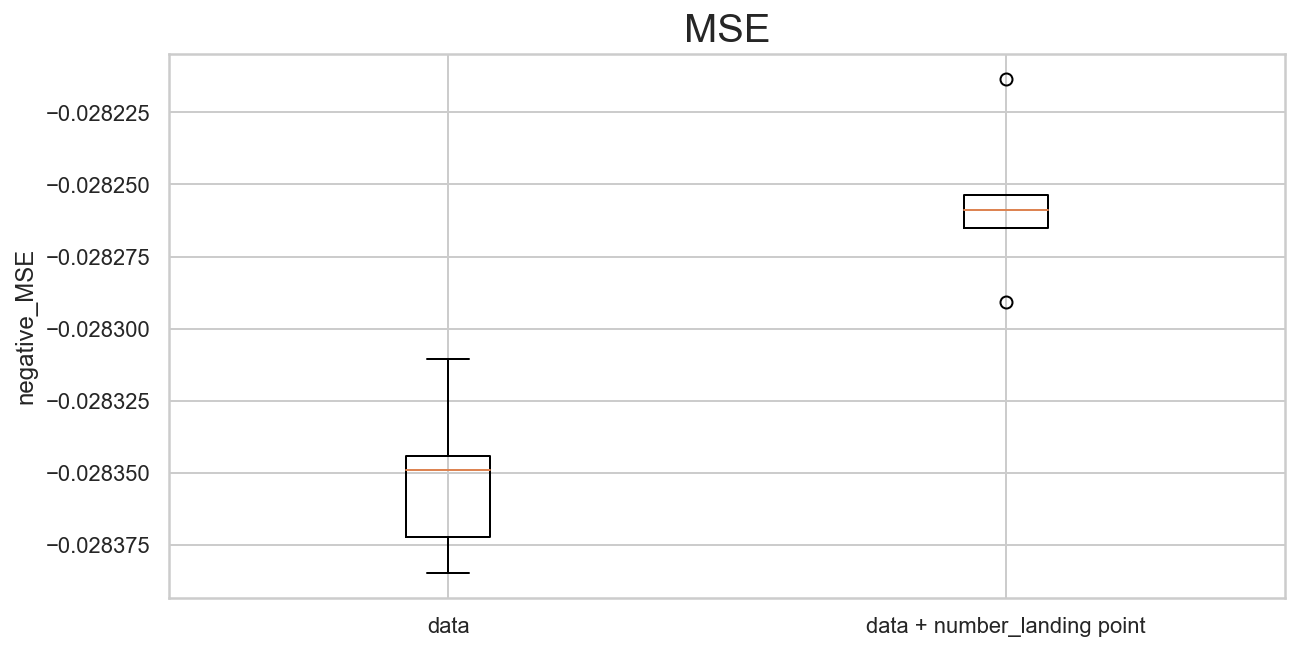

In [133]:
plt.figure(figsize=(10,5))
plt.title("MSE", size=20)
plt.boxplot((result1, result2), labels=("data", "data + number_landing point"))
plt.ylabel("negative_MSE")
plt.show()

In [144]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=X1.columns)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

model_img = RandomForestRegressor(max_depth=4 ,n_estimators=10, random_state=0, min_samples_leaf=3, max_features=0.5, n_jobs=-1).fit(X1, y1)

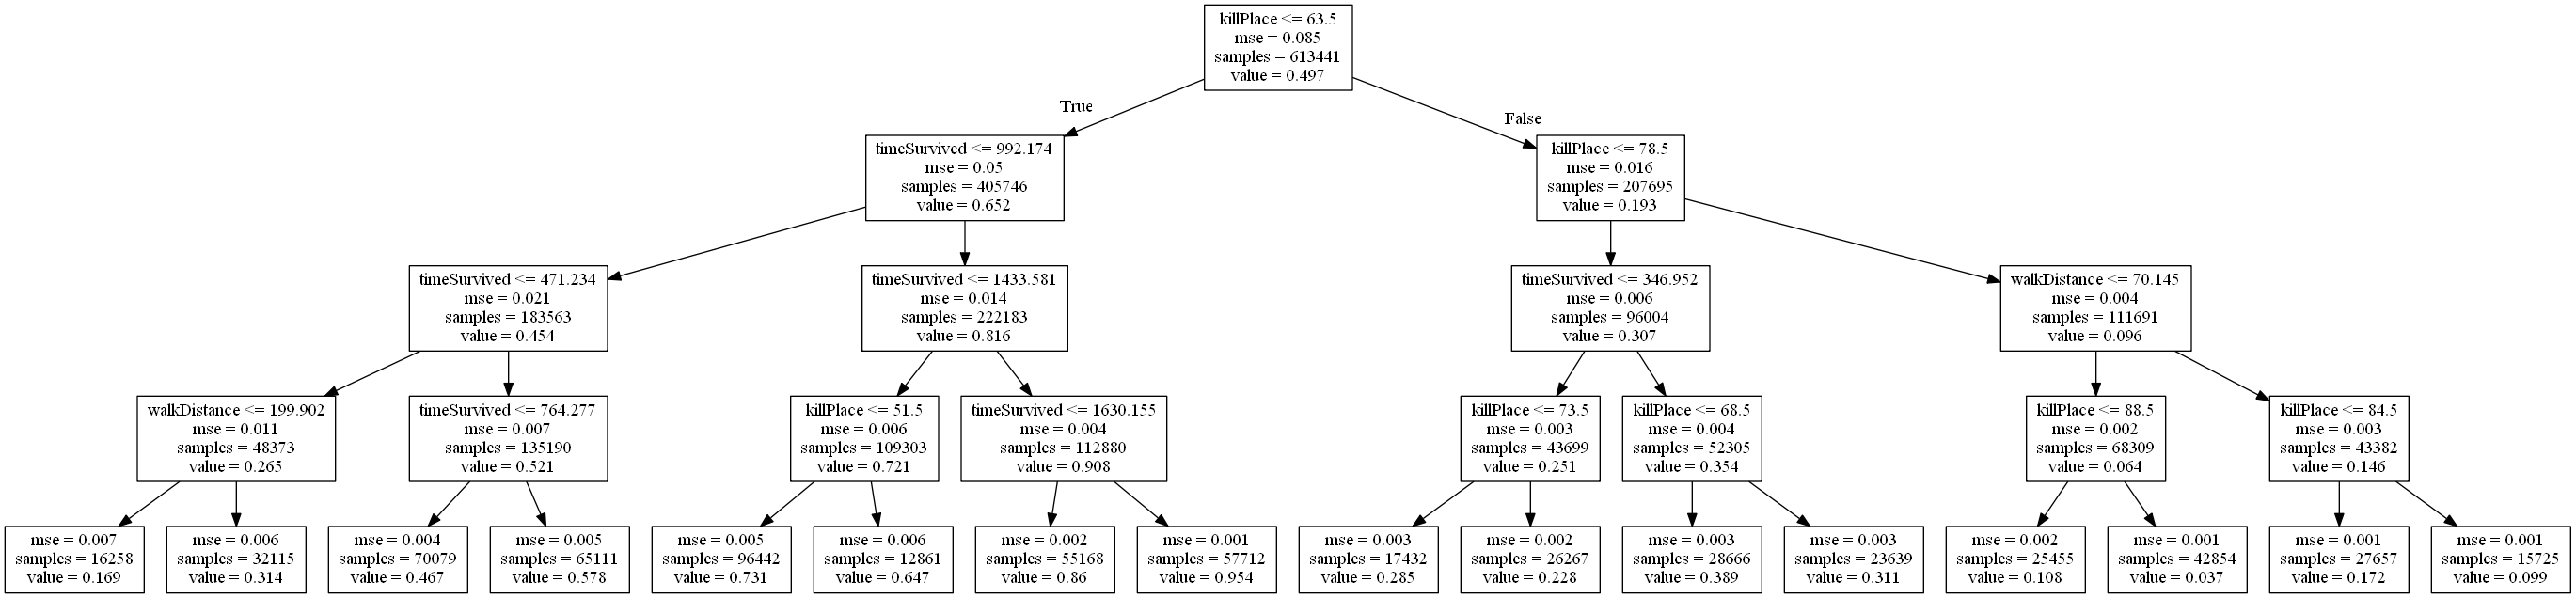

In [145]:
draw_decision_tree(model_img.estimators_[0])